# Sextupole magnets
## A simple example

## Introduction

The Radia Multipole Magnets (*radia_mm*) module [1] is dedicated to the simulations of accelerator electromagnet quadrupoles. *radia_mm* is based on the Radia magnetostatic code [2, 3]. It inclules functions for building multipoles such as bending magnets, quadrupole lenses and higher order multipoles. 

Radia Multipole Magnets provide an upper layer to Radia. It allows to build fully parameterized accelerator magnets with a few command lines. A *radia_mm* object contains parameters (yoke parameters, coil parameters, mesh, etc.) and Radia objects (e.g. the main Radia object named self.obj). Additional methods are provided for visualisation, field analysis and aims to simplify the use of Radia.

Gael Le Bec, ESRF-The European Synchrotron, 2020.

## Imports

In [1]:
# Add paths to RadiaMM and RadiaUtils or added it to your PYTHONPATH
import sys
sys.path.append('../../PyRadia/RadiaMM/') # Radia Multipole Magnets
sys.path.append('../../PyRadia/RadiaUtils/')# Magnetic materials, Radia export functions, etc.

# Import the radia_mm module
import radia_mm as mm
import radia as rad

# Other imports
import numpy as np
from matplotlib.pyplot import plot, xlabel, ylabel, semilogy
from subprocess import Popen

## Build and solve an electromagnet sextupole

The functions below, called with default arguments, build and solve an ESRF-EBS sextupole. The computations should take a few minutes.

In [2]:
# Sextupole parameters
params = mm.SextuEMParam()

# Build and solve
sextu = mm.SextuEM(params)

6 / 7 / 2020  at  12 : 49 : 43  Start to solve the magnetization problem...
6 / 7 / 2020  at  12 : 49 : 59  Magnetization problem solved.


## 3D plot of the magnet geometry

Plot the sextupole:

In [3]:
sextu.plot_geo()

Then plot the yoke:

In [4]:
sextu.yoke.plot_geo()

## Field computations

### Transverse field

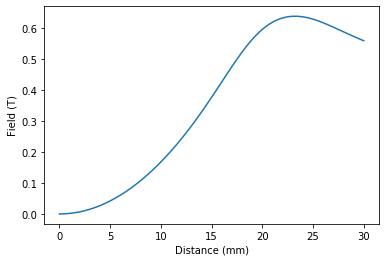

In [3]:
sextu.plot_field([30, 0, 0])

Usage of the *plot_field* method:

In [5]:
help(sextu.plot_field)

Help on method plot_field in module radia_mm:

plot_field(xyz_end, xyz_start=[0, 0, 0], n=100, b='bz', x_axis='d', plot_show=True, plot_title='') method of radia_mm.SextuEM instance
    Compute and plot the field along a straight line
    :param xyz_end: end point [x, y, z]
    :param xyz_start: starting point [x, y, z] (default = [0, 0, 0])
    :param n: number of points (default = 100)
    :param b: field component (default = 'bz')
    :param x_axis: defines the x axis of the plot, x_axis = 'x', 'y', 'z' or 'd' (default = 'd', i.e. distance)
    :param show: show the plot if True
    :param plot_title: plot title



Please see the *field* method for computing the field values on a given straight line. This function is called by the *plot_field* method.

In [8]:
help(sextu.field)

Help on method field in module radia_mm:

field(xyz_end, xyz_start=[0, 0, 0], n=100, b='bz') method of radia_mm.QuadEM instance
    Compute the field along a straight line
    :param xyz_end: end point [x, y, z]
    :param xyz_start: starting point [x, y, z] (default = [0, 0, 0])
    :param n: number of points (default = 100)
    :param b: field component (default = 'bz')
    :return: x, y, z, d, bz: positions, distance to initial point and field



### Sextupole strength along the magnet axis

The sextupole strength shown here is defined as the coefficient of the field expansion:
$$S=\frac{1}{2} \frac{d^2 B}{dx^2}.$$

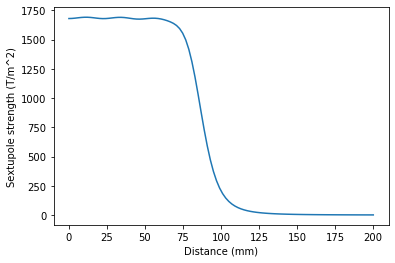

In [8]:
sextu.plot_sextu_strength([0, 200, 0])

The wiggles observed on the figure above are due to the loose longitudinal segmentation of the model. Let's refine the mesh and plot the gradient again.

6 / 7 / 2020  at  12 : 55 : 38  Start to solve the magnetization problem...
6 / 7 / 2020  at  13 : 0 : 22  Magnetization problem solved.


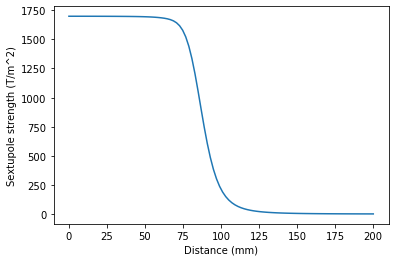

In [9]:
# Refine the mesh
params.refine_mesh(long_sub_n=20)

# Build and solve - Takes longer!
sextu = mm.SextuEM(params)

# Plot the gradient
sextu.plot_sextu_strength([0, 200, 0])

### Integrated field multipoles

The integral of the field can be expressed as series: 
\begin{equation}
B_Z + i B_X = \sum_{1}^{\infty}{\left(b_n + i a_n\right)\left(\frac{x + i z}{\rho_0}\right)^{n-1}}
\end{equation}
where $b_n$ and $a_n$ are the normal and skew multipole coefficients and $\rho_0$ is the reference radius.

           Normal     skew       Normal     skew      
           T mm       T mm       a.u        a.u.      
         0  -1.91e-05   2.34e-10  -0.00e+00   0.00e+00
         1   1.45e-10   6.59e-10   0.00e+00   0.00e+00
         2   5.09e+01   6.97e-10   1.00e+04   0.00e+00
         3   5.14e-10   8.12e-16   0.00e+00   0.00e+00
         4   2.68e-04  -6.97e-10   5.00e-02  -0.00e+00
         5   1.45e-10  -6.59e-10   0.00e+00  -0.00e+00
         6  -2.69e-07  -2.34e-10  -0.00e+00  -0.00e+00
         7  -8.03e-10  -4.44e-16  -0.00e+00  -0.00e+00
         8   1.38e-01   2.34e-10   2.70e+01   0.00e+00
         9   1.45e-10   6.59e-10   0.00e+00   0.00e+00
        10   2.08e-03   6.97e-10   4.10e-01   0.00e+00
        11   5.14e-10   1.70e-15   0.00e+00   0.00e+00
        12   2.35e-07  -6.97e-10   0.00e+00  -0.00e+00
        13   1.45e-10  -6.59e-10   0.00e+00  -0.00e+00
        14  -8.17e-02  -2.34e-10  -1.60e+01  -0.00e+00


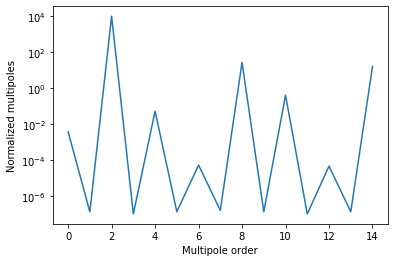

In [12]:
# Reference radius (mm)
rho = 13

# Integrated multipoles
multi = sextu.multipoles(r0=rho)[0]

# Print
print('{0:{w}} {1:{w}} {2:{w}} {3:{w}} {4:{w}}'.format('', 'Normal', 'skew', 'Normal', 'skew', w=10))
print('{0:{w}} {1:{w}} {2:{w}} {3:{w}} {4:{w}}'.format('', 'T mm', 'T mm', 'a.u', 'a.u.', w=10))
for k in range(len(multi)):
    print('{0:{w}} {1:{w}.2e} {2:{w}.2e} {3:{w}.2e} {4:{w}.2e}' \
          .format(k, np.real(multi[k]), np.imag(multi[k]), 
                  round(1e4*np.real(multi[k])/abs(multi[2]), 2), 
                  round(1e4*np.imag(multi[k])/abs(multi[2]), 2), w=10))
    
# Plot
semilogy(1e4*np.abs(multi)/abs(multi[2]))
xlabel('Multipole order');
ylabel('Normalized multipoles');

Usage of the *multipoles* and *strengths* methods:

In [13]:
help(sextu.multipoles)
help(sextu.strengths)

Help on method multipoles in module radia_mm:

multipoles(r0=10, xz0=[0, 0], n_multi=32) method of radia_mm.SextuEM instance
    Basic 2D circular multipole computations
    :param r0=10: reference radius (mm)
    :param xz0=[0,0]: Centre [x0, z0] (mm)
    :param n_multi=32: number of multipole coefficients
    :return multi, ib, ib_r, xz: complex numpy arrays: multipoles (Tmm), integrated fields ibz + 1j * ibx (Tmm),
            radial field (Tmm), positions (mm)

Help on method strengths in module radia_mm:

strengths(r0=10, xz0=[0, 0], n_multi=32, b_rho=1) method of radia_mm.SextuEM instance
    Basic 2D multipole strength computations
    param r0=10: reference radius (mm)
    :param xz0=[0,0]: Centre [x0, z0] (mm)
    :param n_multi=32: number of multipole strength coefficients
    :param b_rho=1: magnetic rigidity (Tmm)
    :return: strengths: complex numpy array containing the multipole strengths



**Note** At the present stage of the RadiaMM development, the multipole computations are basic. It is not foreseen to develop it further in this module, but to build another independent C++ library dedicated to that purpose. 

## References

[1] The <a href="https://gitlab.esrf.fr/IDM/radia/radiamm" target="_blank">radia_mm</a> Python module

[2] Radia <a href="https://github.com/ochubar/Radia" target="_blank">Github</a> repository

[3] o Chubar *et al*, J. Synchrotron Rad. 5, pp. 481-484, 1998

[4] G Le Bec *et al.*, Phys. Rev. st Accel. Beams 19, 052401, 2016  